# 📊 Log Analysis Dashboard
This notebook provides insights and visualizations based on the log data collected through the pipeline.
---

In [1]:
# Required libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [10]:
# Connect to the SQLite database
conn = sqlite3.connect('./sqlite_loader/siem_logs.db')
query = 'SELECT * FROM siem_logs'
df = pd.read_sql_query(query, conn)
df.head()

OperationalError: unable to open database file

## 🧼 Basic Cleaning & Info

In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      18 non-null     datetime64[ns]
 1   user           18 non-null     object        
 2   ip_address     18 non-null     object        
 3   event_type     18 non-null     object        
 4   status         18 non-null     object        
 5   location       18 non-null     object        
 6   device         18 non-null     object        
 7   file_accessed  10 non-null     object        
 8   anomalous      18 non-null     object        
dtypes: datetime64[ns](1), object(8)
memory usage: 1.4+ KB


## 📊 Device Distribution

In [5]:
device_counts = df['device'].value_counts()
fig = px.pie(names=device_counts.index, values=device_counts.values, title='Device Usage Distribution')
fig.show()

## 📈 Volume of Logs Over Time

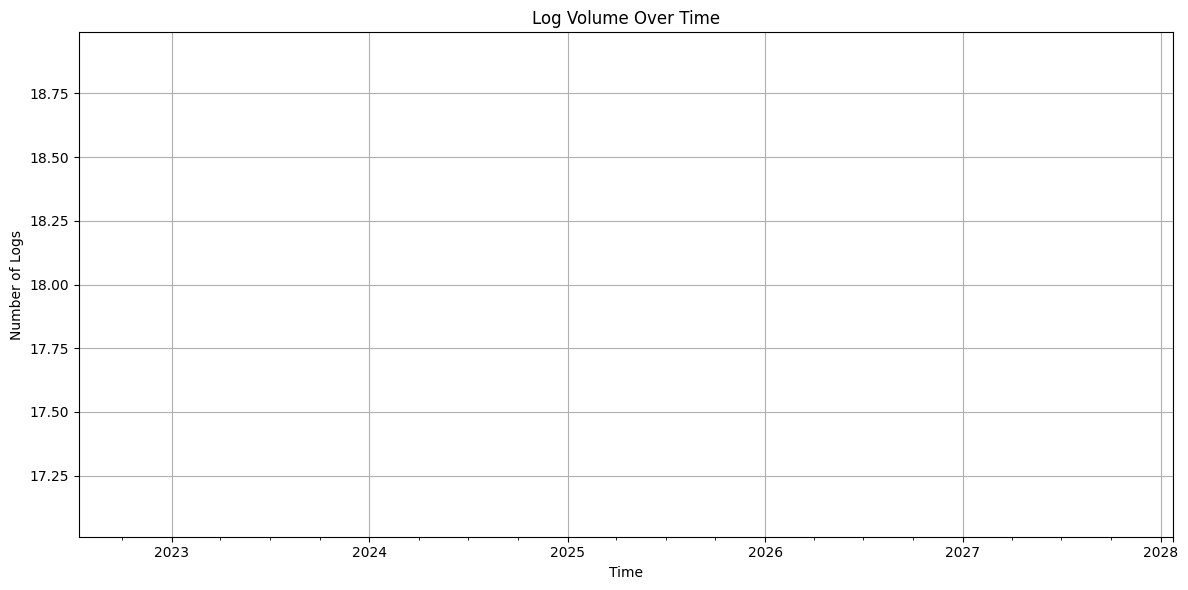

In [6]:
df.set_index('timestamp', inplace=True)
logs_per_hour = df.resample('1H').size()
logs_per_hour.plot(figsize=(12,6), title='Log Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Logs')
plt.grid(True)
plt.tight_layout()
plt.show()

## 👤 Top 10 Users by Number of Events

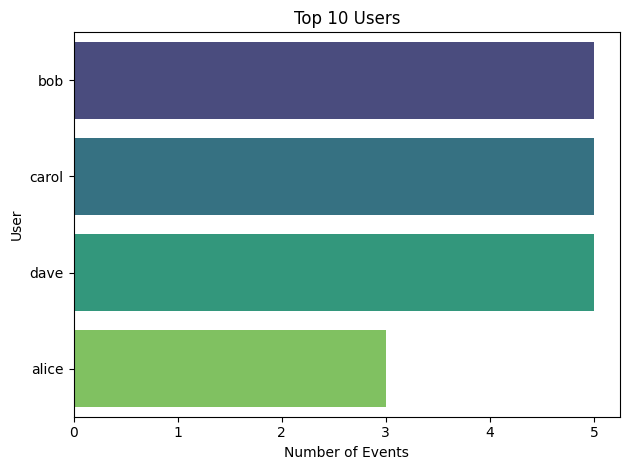

In [7]:
top_users = df['user'].value_counts().head(10)
sns.barplot(y=top_users.index, x=top_users.values, palette='viridis')
plt.title('Top 10 Users')
plt.xlabel('Number of Events')
plt.ylabel('User')
plt.tight_layout()
plt.show()

## 🌍 IP Geolocation (Example-based)

In [ ]:
# Optional: Geolocation (mock example, since Faker IPs are random)
from ip2geotools.databases.noncommercial import DbIpCity
sample_ips = df['ip_address'].dropna().unique()[:5]
for ip in sample_ips:
    response = DbIpCity.get(ip, api_key='free')
    print(f'{ip} -> {response.city}, {response.country}')

## 🚨 Number of Anomalous Events

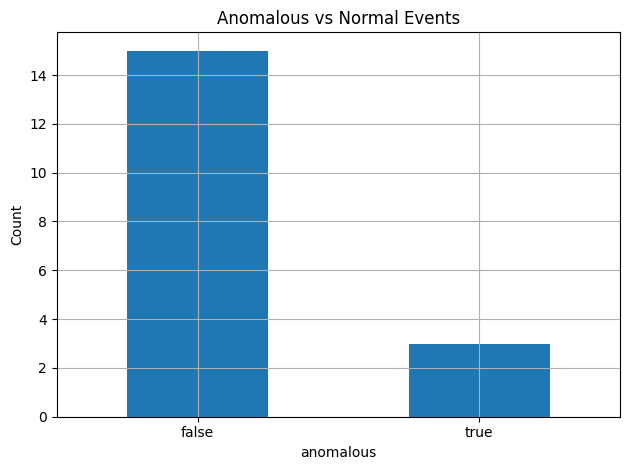

In [8]:
df['anomalous'].value_counts().plot(kind='bar', title='Anomalous vs Normal Events')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

## ✅ Status Distribution

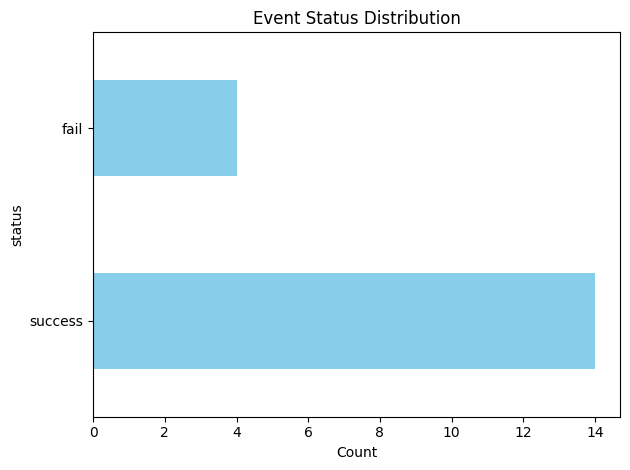

In [9]:
df['status'].value_counts().plot(kind='barh', color='skyblue', title='Event Status Distribution')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

## 💾 Export to CSV

In [ ]:
df.reset_index().to_csv('processed_logs.csv', index=False)
print('Exported to processed_logs.csv')